In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import sys

In [22]:
b=wavfile.read("./dc0_base.wav")
"""b=np.zeros(90000)
b[0]=2500
b[28000]=1500
b[60000]=2400
b[66000]=2400
b[83000]=1500"""
c=wavfile.read("./dc0_conv.wav")
#print(b[1][:,0][:10])
b=b[1][:,0]
c=c[1][:,0]
if len(c)>len(b):
    b=np.append(b,np.zeros(len(c)-len(b)))
else:
    c=np.append(c,np.zeros(len(b)-len(c)))

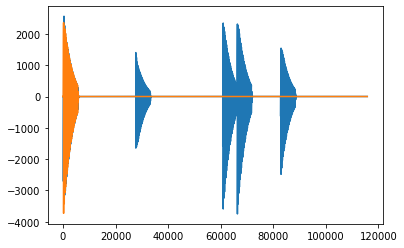

In [23]:
ls=np.arange(0,len(b))
plt.plot(ls,c)
plt.plot(ls,b)

$b(x)*a(x)=c(x)$  
$\sqrt{2\pi}\hat{b}\cdot\hat{a}=\sqrt{2\pi}\hat{c}$  
$\hat{a}=\frac{\hat{c}}{\hat{b}}$  
$a=\mathcal{F}^{-1}(\hat{a})$

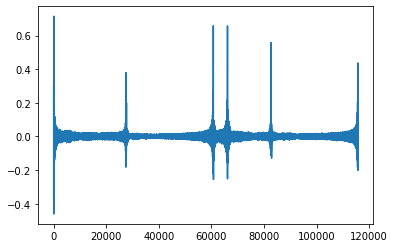

In [24]:
bt=np.fft.fft(b)
ct=np.fft.fft(c)
#btp=np.diff(bt)
#ctp=np.diff(ct)
ll=len(b)
at=np.zeros(ll,dtype = 'complex_')
for i in range(ll):
    if ct[i]!=0:
        at[i]=ct[i]/bt[i]
    #elif bt[i]==0 and ctp[i]!=0:
        #at[i]=ctp[i]/btp[i]
        #print("G")
    else:
        at[i]=0
a=np.fft.ifft(at)
plt.plot(ls,a)